In [1]:
from __future__ import print_function

import pylab as pl
%pylab inline
import seaborn
import numpy as np

from scipy.optimize import curve_fit, minimize

Populating the interactive namespace from numpy and matplotlib


/opt/rh/anaconda/root/envs/PUI2016_Python2/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [2]:
#distributions = ['pois', 'gaus', 'chisq', 'cauchy', 'lnorm', 'binomial']
mymean = 100

In [3]:
mysize = (2000 / (np.array(range(1, 101)))).astype(int)
print (mysize, mysize.shape)

[2000 1000  666  500  400  333  285  250  222  200  181  166  153  142  133
  125  117  111  105  100   95   90   86   83   80   76   74   71   68   66
   64   62   60   58   57   55   54   52   51   50   48   47   46   45   44
   43   42   41   40   40   39   38   37   37   36   35   35   34   33   33
   32   32   31   31   30   30   29   29   28   28   28   27   27   27   26
   26   25   25   25   25   24   24   24   23   23   23   22   22   22   22
   21   21   21   21   21   20   20   20   20   20] (100,)


In [4]:
np.random.seed(0)

In [5]:
md = {}

## Distribution 1: Chi-squared

In [6]:
df = mymean

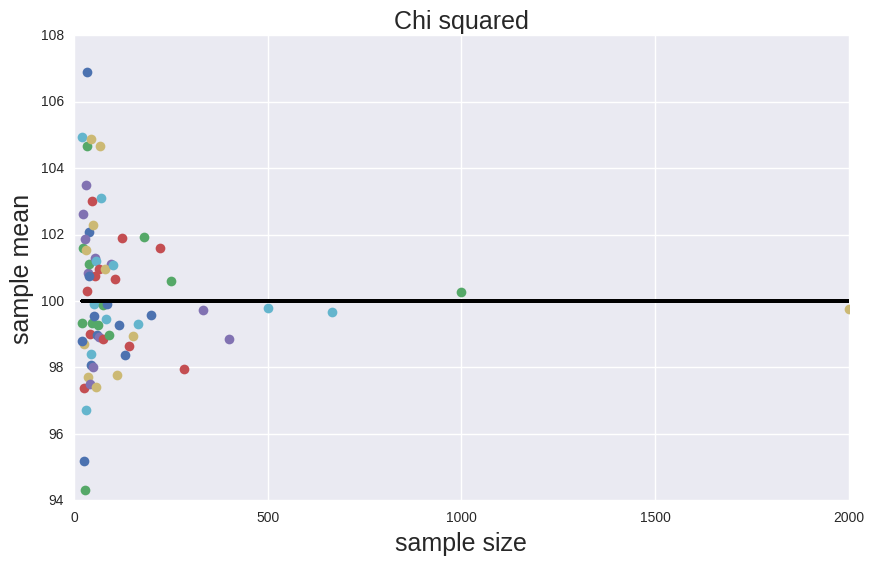

In [7]:
md['chisq'] = {} 

for n in mysize:
    md['chisq'][n] = np.random.chisquare(df, size = n)
      
md['chisq']['means'] = {}

axchisq_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['chisq']:
    if not type(nn) == str:
        md['chisq']['means'][nn] = md['chisq'][nn].mean()
        
        axchisq_mu_n.plot(nn, md['chisq']['means'][nn], 'o')
        axchisq_mu_n.set_xlabel('sample size', fontsize=18)
        axchisq_mu_n.set_ylabel('sample mean', fontsize=18)
        axchisq_mu_n.set_title('Chi squared', fontsize=18)
        
        axchisq_mu_n.plot([min(mysize), max(mysize)], [df, df], 'k')

### Figure 1: For Chi-sqaured distribution, sample mean is more likely to equal to the mean of parent distribution, as sample size increases.

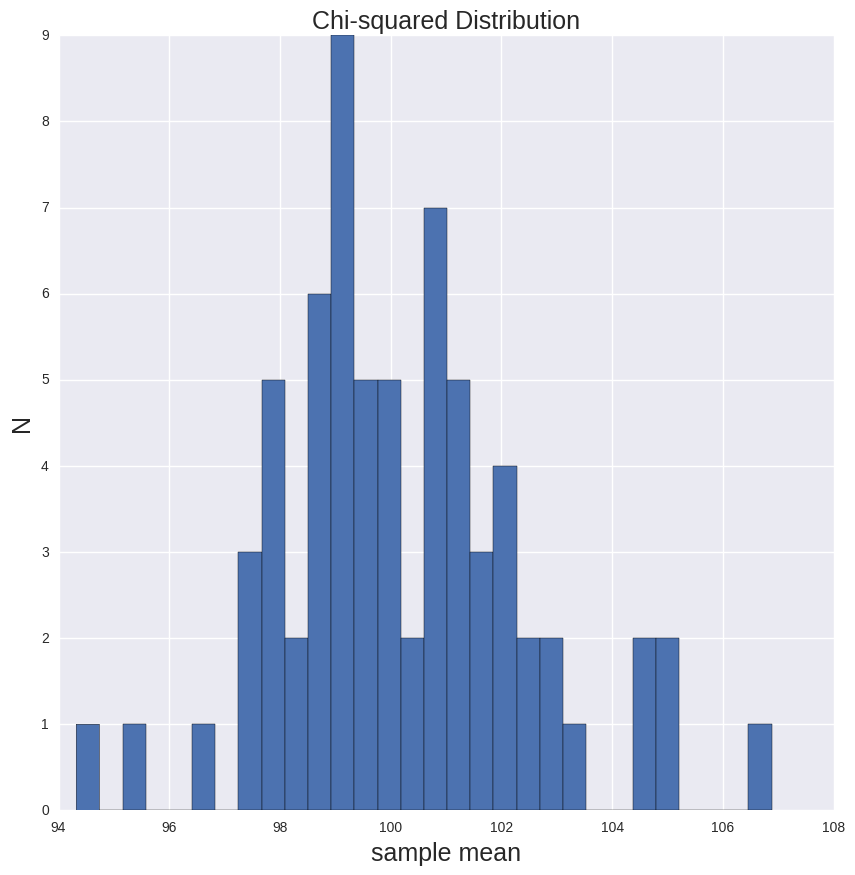

In [8]:
allmeans_chisq = list(md['chisq']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_chisq,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Chi-squared Distribution', fontsize=18)

### Figure 2: For Chi-squared distribution, sample means follow a Gaussian distribution.

## Distribution 2: Gaussian

In [9]:
mu_gaus = mymean

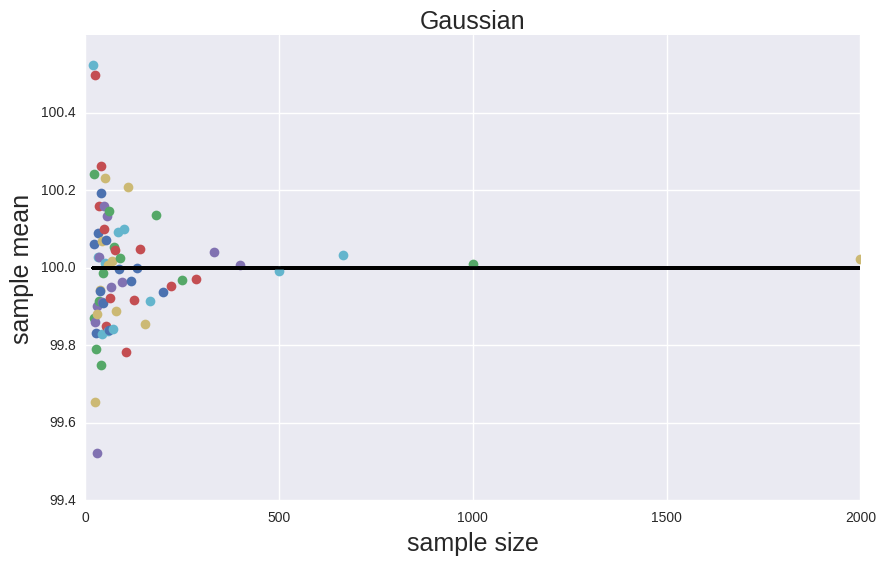

In [10]:
md['gaus'] = {} 

for n in mysize:
    md['gaus'][n] = np.random.normal(loc = float(mu_gaus), size = n)
    
md['gaus']['means'] = {}

axgaus_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['gaus']:
    if not type(nn) == str:
        md['gaus']['means'][nn] = md['gaus'][nn].mean()
        
        axgaus_mu_n.plot(nn, md['gaus']['means'][nn], 'o')
        axgaus_mu_n.set_xlabel('sample size', fontsize=18)
        axgaus_mu_n.set_ylabel('sample mean', fontsize=18)
        axgaus_mu_n.set_title('Gaussian', fontsize=18)
        
        axgaus_mu_n.plot([min(mysize), max(mysize)], [float(mu_gaus), float(mu_gaus)], 'k')

### Figure 3: For Gaussian distribution, sample mean is more likely to equal to the mean of parent distribution, as sample size increases.

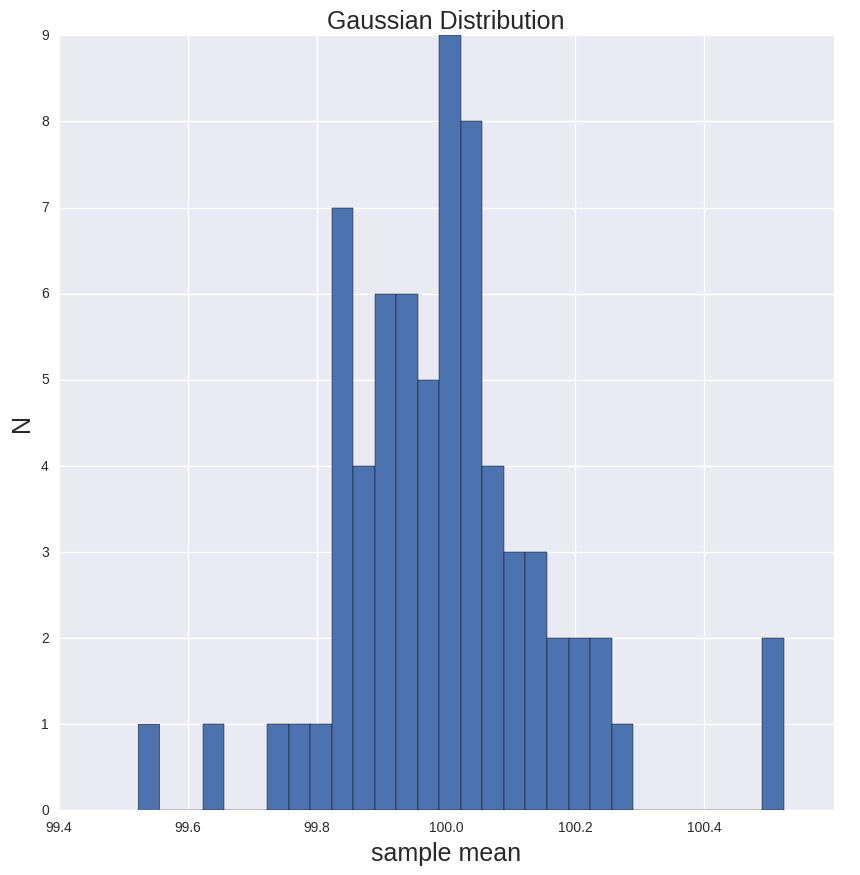

In [11]:
allmeans_gaus = list(md['gaus']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_gaus,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Gaussian Distribution', fontsize=18)

### Figure 4: For Gaussian distribution, sample means follow a Gaussian distribution.

## Distribution 3: Poisson

In [12]:
lam_pois = mymean

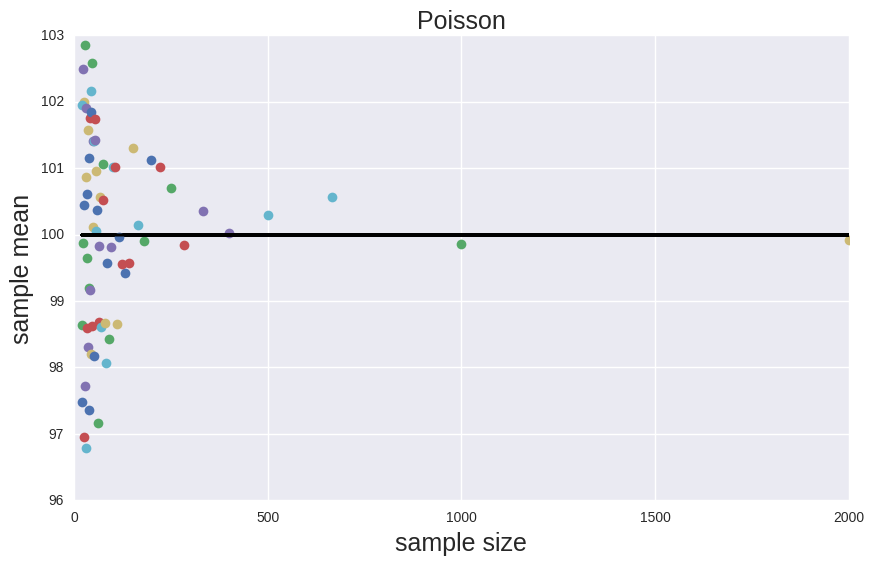

In [13]:
md['pois'] = {} 

for n in mysize:
    md['pois'][n] = np.random.poisson(lam = float(lam_pois), size = n)
    
md['pois']['means'] = {}

axpois_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['pois']:
    if not type(nn) == str:
        md['pois']['means'][nn] = md['pois'][nn].mean()
        
        axpois_mu_n.plot(nn, md['pois']['means'][nn], 'o')
        axpois_mu_n.set_xlabel('sample size', fontsize=18)
        axpois_mu_n.set_ylabel('sample mean', fontsize=18)
        axpois_mu_n.set_title('Poisson', fontsize=18)
        
        axpois_mu_n.plot([min(mysize), max(mysize)], [float(lam_pois), float(lam_pois)], 'k')

### Figure 5: For Poisson distribution, sample mean is more likely to equal to the mean of parent distribution, as sample size increases.

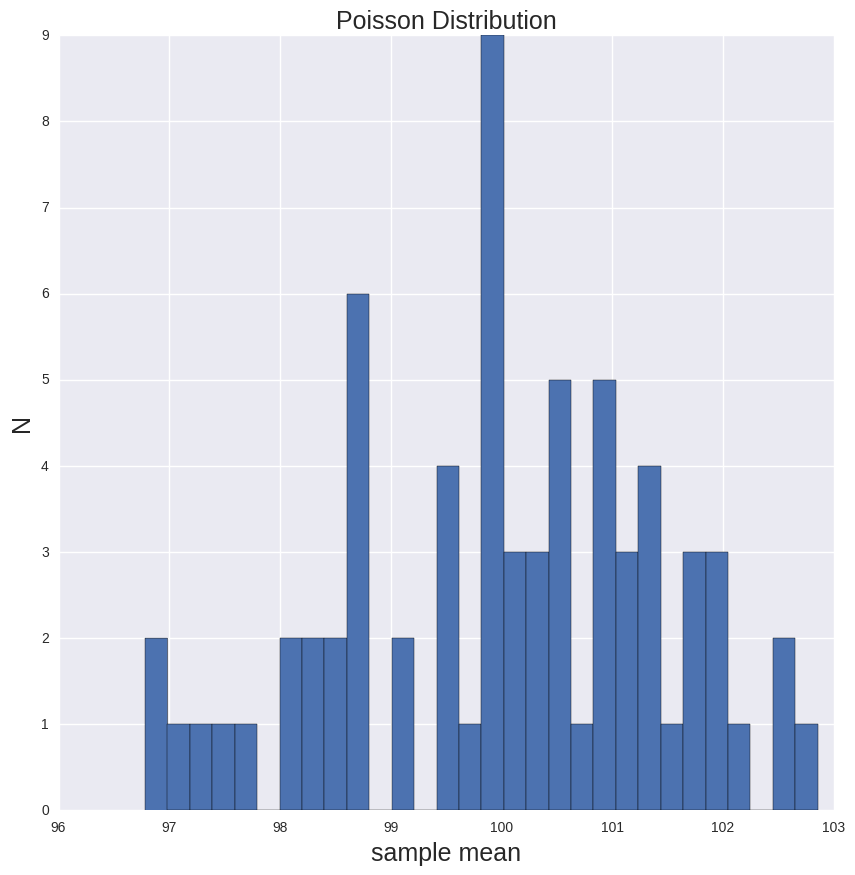

In [14]:
allmeans_pois = list(md['pois']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_pois,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Poisson Distribution', fontsize=18)

### Figure 6: For Poisson distribution, sample means follow a Gaussian distribution.

## Distribution 4: Binomial

In [15]:
np_binomial = mymean
p = .5

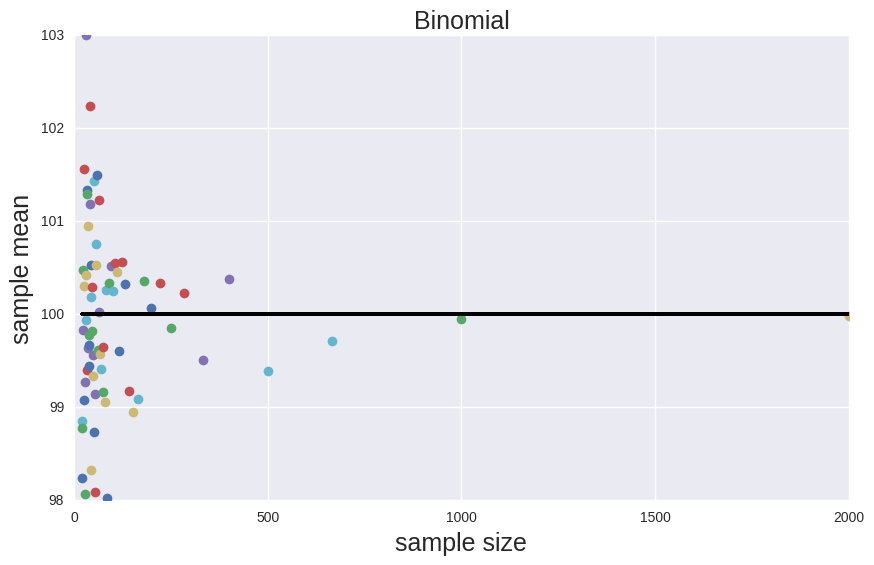

In [16]:
md['binomial'] = {} 

for n in mysize:
    md['binomial'][n] = np.random.binomial(np_binomial / p, p, size = n)
    
md['binomial']['means'] = {}

axbinomial_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['binomial']:
    if not type(nn) == str:
        md['binomial']['means'][nn] = md['binomial'][nn].mean()
        
        axbinomial_mu_n.plot(nn, md['binomial']['means'][nn], 'o')
        axbinomial_mu_n.set_xlabel('sample size', fontsize=18)
        axbinomial_mu_n.set_ylabel('sample mean', fontsize=18)
        axbinomial_mu_n.set_title('Binomial', fontsize=18)
        
        axbinomial_mu_n.plot([min(mysize), max(mysize)], [np_binomial, np_binomial], 'k')

### Figure 7: For Binomial distribution, sample mean is more likely to equal to the mean of parent distribution, as sample size increases.

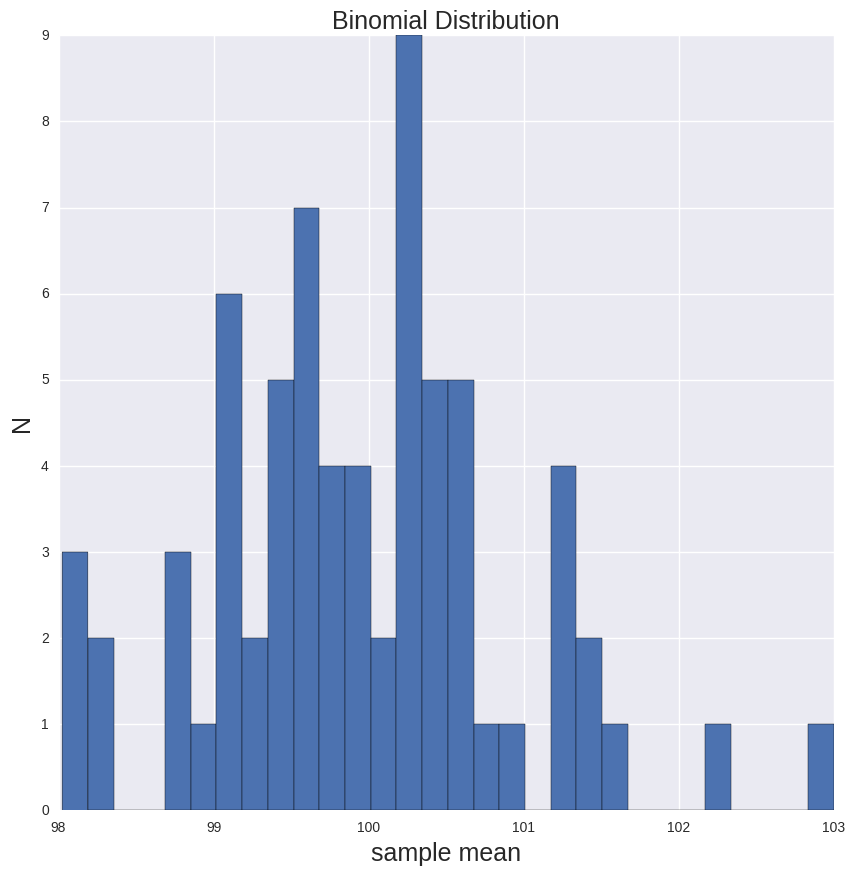

In [17]:
allmeans_binomial = list(md['binomial']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_binomial,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Binomial Distribution', fontsize=18)

### Figure 8: For Binomial distribution, sample means follow a Gaussian distribution.

## Distribution 5: Logistic

In [18]:
mean_logistic = mymean

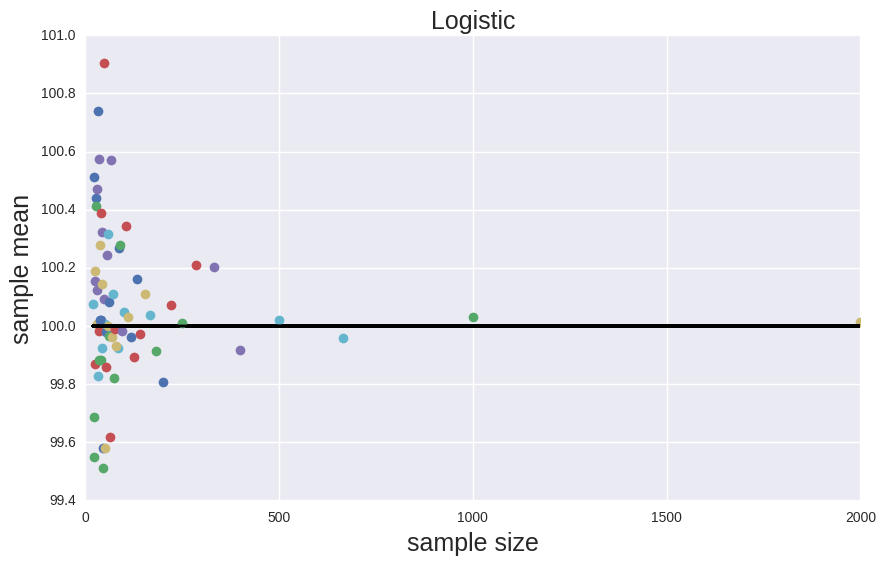

In [19]:
md['logistic'] = {} 

for n in mysize:
    md['logistic'][n] = np.random.logistic(loc = float(mean_logistic), size = n)
    
md['logistic']['means'] = {}

axlogistic_mu_n = pl.figure(figsize=(10,6)).add_subplot(111)

for nn in md['logistic']:
    if not type(nn) == str:
        md['logistic']['means'][nn] = md['logistic'][nn].mean()
        
        axlogistic_mu_n.plot(nn, md['logistic']['means'][nn], 'o')
        axlogistic_mu_n.set_xlabel('sample size', fontsize=18)
        axlogistic_mu_n.set_ylabel('sample mean', fontsize=18)
        axlogistic_mu_n.set_title('Logistic', fontsize=18)
        
        axlogistic_mu_n.plot([min(mysize), max(mysize)], [float(mean_logistic), float(mean_logistic)], 'k')

### Figure 9: For Logistic distribution, sample mean is more likely to equal to the mean of parent distribution, as sample size increases.

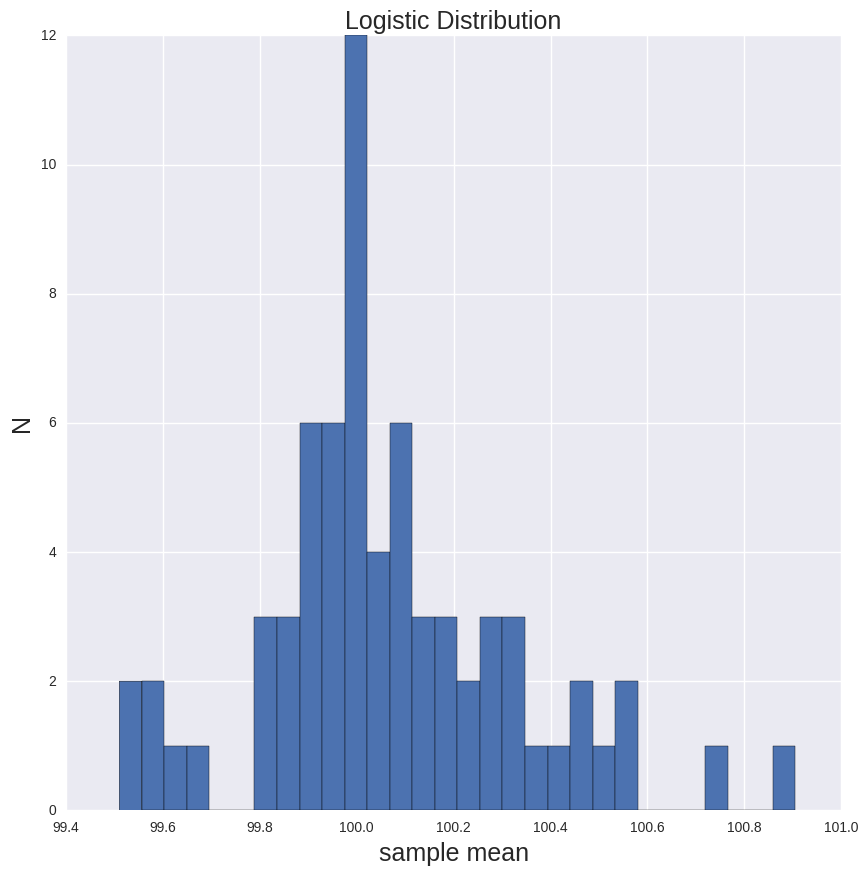

In [20]:
allmeans_logistic = list(md['logistic']['means'].values())

pl.figure(figsize=(10, 10))
pl.hist(allmeans_logistic,bins=30)
pl.xlabel('sample mean', fontsize = 18)
pl.ylabel('N', fontsize = 18)
pl.title('Logistic Distribution', fontsize=18)

### Figure 10: For Logistic distribution, sample means follow a Gaussian distribution.